## Exploratory Data Analysis (EDA)

[Exploratory Data Analysis (EDA)][1] is an approach to analyzing data that focuses on summarizing the main characteristics of a data set. One of the goals behind EDA is the formulation of new hypotheses that could again lead to further data collection and more experiments.

One of EDA's major proponents, the venerable statistician [John Tukey][2], was a major force behind the acceptence of EDA into every data scientist's toolbox, and his efforts to popularize the practice encouraged the development of statistical computing packages such as the [S][3] and [R][4] programming languages. The matplotlib library can itself be seen as being directly influenced by the work of Tukey. 

![John Tukey][5]

Exploratory data analysis can encompass many different techniques, but key amongst these is the act of visualizing the data set in question. In this lesson, we'll get a sneak peak into the power that matplotlib posseses by uisng the library to perform several simple visualizations on a well known data set to see what we can learn about the data.

[1]: https://en.wikipedia.org/wiki/Exploratory_data_analysis
[2]: https://en.wikipedia.org/wiki/John_Tukey
[3]: https://en.wikipedia.org/wiki/S_(programming_language)
[4]: https://en.wikipedia.org/wiki/R_(programming_language)
[5]: https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg "John Tukey"

## Importing the Library

Matplotlib has exactly three different interfaces to choose from. For this lesson, we'll see arguably the simplest one in action. The `pylab` interface that we'll be using for this lesson was the first interface ever created for matplotlib, and though it has fallen out of favor for many good reasons, in my opinion, it can still be quite useful during the exploratory phase of your analysis. For that reason, it's only fitting that we use it here to explore our data set.

The two lines below will setup our 

In [1]:
%matplotlib inline
from pylab import *

## The Census Income Data Set

UC Irvine maintains a repository of over 300 sets of real world data for use in testing machine learning algorithms. This repository is a fantastic resource since it allows us to play around with a small, real world dataset while ignoring all of the cumbersome pre-processing that you normally would have to do before getting to take a look at the data.

In this quick example of matplotlib in action, we will be using the ["Census Income"][1] data set, also known as the ["Adult"][2] data set. This purpose of this dataset is to predict whether or not an individual makes more than \$50k based on several attributes about the individual gathered during the 1994 Census.

[1]: http://archive.ics.uci.edu/ml/datasets/Census+Income
[2]: http://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
import csv
import urllib2

response = urllib2.urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
adult_data_csv = response.read().strip()
data = []
for row in csv.reader(adult_data_csv.splitlines()):
    data.append((
        (int(row[0])),      # age
        row[1].strip(),     # workclass
        row[3].strip(),     # education
        (int(row[4])),      # education-num
        row[5].strip(),     # marital-status
        row[6].strip(),     # occupation
        row[7].strip(),     # relationship
        row[7].strip(),     # race
        row[9].strip(),     # sex
        (int(row[10])),     # capital-gain
        (int(row[11])),     # capital-loss
        (int(row[12])),     # hours-per-week
        row[13].strip(),    # native-country
        row[14].strip(),    # target
    ))

In [3]:
import csv
import urllib2

response = urllib2.urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
adult_data_csv = response.read().strip()
data = []
for row in csv.reader(adult_data_csv.splitlines()):
    data.append({
        'age': (int(row[0])),
        'workclass': row[1].strip(),
        'education': row[3].strip(),
        'education-num': (int(row[4])),
        'marital-status': row[5].strip(),
        'occupation': row[6].strip(),
        'relationship': row[7].strip(),
        'race': row[7].strip(),
        'sex': row[9].strip(),
        'capital-gain': (int(row[10])),
        'capital-loss': (int(row[11])),
        'hours-per-week': (int(row[12])),
        'native-country': row[13].strip(),
        'target': row[14].strip(),
    })

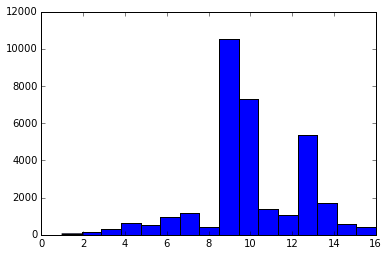

In [4]:
edu_num = [r['education-num'] for r in data]
hist(edu_num, bins=max(edu_num));

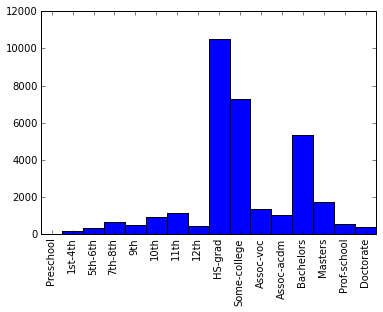

In [5]:
from collections import Counter

freqs = Counter(r['education'] for r in data)
keys = (
    'Preschool', 
    '1st-4th', 
    '5th-6th', 
    '7th-8th', 
    '9th', 
    '10th', 
    '11th', 
    '12th', 
    'HS-grad', 
    'Some-college', 
    'Assoc-voc', 
    'Assoc-acdm', 
    'Bachelors', 
    'Masters', 
    'Prof-school', 
    'Doctorate'
)
vals = [freqs[k] for k in keys]
bins = len(keys)

# For a bar graph, the first argument is the values at which the 
# bars will be place. We set the width to 1 (default is 0.8) to 
# remove any whitespace between bars and make it look more like the 
# histogram. We set the align to 'edge' (default is 'center') to make
# sure that the left edge of the bar is aligned with its value.
bar(range(bins), vals, width=1, align='edge')
# Since the bars' left edges are aligned with their values, we have to 
# move the x-tick labels in a bit to make them centered within the bar.
# Since the bars are all a width of 1, we simply need to add 0.5 to the
# left values of every tick. Finally, we rotate the labels 90 degrees 
# so they are readable.
xticks([i + 0.5 for i in range(bins)], keys, rotation=90)
# Making the graph as tight as possible by limiting the X-axis values.
xlim([0, bins]);

/Users/croach/anaconda/envs/jupyter/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


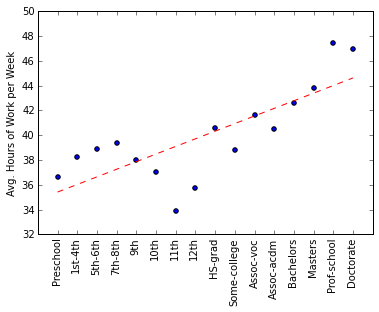

In [6]:
vals = []
for key in keys:
    vals.append(
        average([r['hours-per-week'] for r in data if r['education'] == key])
    )
bins = len(keys)
xs = range(1, bins+1)

scatter(xs, vals)
m, b = polyfit(xs, vals, 1)
plot(xs, [m*x+b for x in xs], 'r--')

# plot(range(bins), vals)
# # Since the bars' left edges are aligned with their values, we have to 
# # move the x-tick labels in a bit to make them centered within the bar.
# # Since the bars are all a width of 1, we simply need to add 0.5 to the
# # left values of every tick. Finally, we rotate the labels 90 degrees 
# # so they are readable.
xticks(xs, keys, rotation=90)
# # Making the graph as tight as possible by limiting the X-axis values.
xlim([0, bins+1])

ylabel('Avg. Hours of Work per Week');

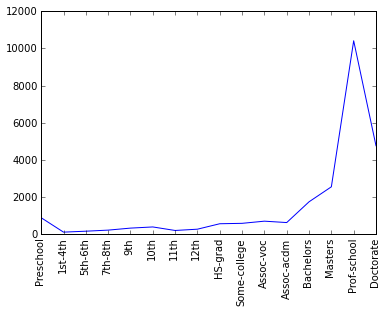

In [7]:
vals = []
for key in keys:
    vals.append(
        average([r['capital-gain'] for r in data if r['education'] == key])
    )
bins = len(keys)

plot(range(bins), vals)
# Since the bars' left edges are aligned with their values, we have to 
# move the x-tick labels in a bit to make them centered within the bar.
# Since the bars are all a width of 1, we simply need to add 0.5 to the
# left values of every tick. Finally, we rotate the labels 90 degrees 
# so they are readable.
xticks(range(bins), keys, rotation=90)
# Making the graph as tight as possible by limiting the X-axis values.
xlim([0, bins-1]);

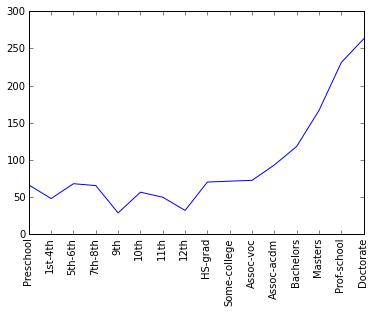

In [8]:
vals = []
for key in keys:
    vals.append(
        average([r['capital-loss'] for r in data if r['education'] == key])
    )
bins = len(keys)

plot(range(bins), vals)
# Since the bars' left edges are aligned with their values, we have to 
# move the x-tick labels in a bit to make them centered within the bar.
# Since the bars are all a width of 1, we simply need to add 0.5 to the
# left values of every tick. Finally, we rotate the labels 90 degrees 
# so they are readable.
xticks(range(bins), keys, rotation=90)
# Making the graph as tight as possible by limiting the X-axis values.
xlim([0, bins-1]);